<a href="https://colab.research.google.com/github/pokablive/class-jyouhoushori/blob/main/gan_git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generative Adversarial Network

GAN，敵対的生成ネットワーク{cite}`Goodfellow2014-eg`

In [ ]:
# packageのimport
from typing import Any, Union, Callable, Type, TypeVar
from tqdm.std import trange,tqdm
import numpy as np
import numpy.typing as npt
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from PIL import Image
import cv2
import requests

# pytorch関連のimport
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [ ]:
from src import utils
SEED = 2023_7_17
utils.set_seed(SEED)

## GANの仕組み

GANは俗にいう __生成モデル__ の一つであり，__Generator__ と __Discriminator__ の二つのネットワークを互いに競争させるように訓練を行うことで品質の良いデータを生成できるようにしたモデルです．

### 贋作者と鑑定士

画像を生成することを例に考えていきましょう．  
Generatorは贋作者と例えられます．これは本物の画像のような偽物の画像を生成するネットワークです．ネットワークはランダムなノイズベクトルを入力として受け取り，全結合層やDeconvolutionのようなレイヤーを持つネットワークを使って画像を生成します．

> ![](https://jp.mathworks.com/help/deeplearning/ug/traingenerativeadversarialnetworkganexample_01_ja_JP.png)
> 出典：[敵対的生成ネットワーク (GAN) の学習 - MATLAB & Simulink - MathWorks 日本](https://jp.mathworks.com/help/deeplearning/ug/train-generative-adversarial-network.html)

これに対してDiscriminatorは鑑定士とも例えられます．入力された画像が本物の画像か，それともGeneratorが生成した偽物なのかを判別するだけの二値分類器です．

Discriminatorが本物と偽物を分類する能力を上げるごとに，Generatorはこれを騙せるような高品質の画像を生成できるように能力を上げていきます．つまり二つのネットワークはイタチごっこのようにそれぞれの能力を向上させるのです．

> ![](https://jp.mathworks.com/help/deeplearning/ug/traingenerativeadversarialnetworkganexample_02_ja_JP.png)
> 出典：[敵対的生成ネットワーク (GAN) の学習 - MATLAB & Simulink - MathWorks 日本](https://jp.mathworks.com/help/deeplearning/ug/train-generative-adversarial-network.html)

#### Generator (贋作者)

mnistのような簡単なデータを生成するネットワークを用意します．ネットワークはただのMLPです．

In [ ]:
class Reshape(nn.Module):
    def __init__(self, img_shape:tuple[int]) -> None:
        super().__init__()
        self.img_shape = img_shape

    def forward(self,x:torch.Tensor)->torch.Tensor:
        return x.view((x.shape[0], *self.img_shape))

    def extra_repr(self) -> str:
        return 'in_features={}, out_img_shape={}'.format(
            np.prod(self.img_shape),self.img_shape,
        )

In [ ]:
def build_generator(in_features:int, out_features:int)->nn.Sequential:
    img_shape = (int(out_features**(1/2)), int(out_features**(1/2)))
    return nn.Sequential(
        nn.Linear(in_features, 200),
        nn.ReLU(),
        nn.Linear(200,500),
        nn.ReLU(),
        nn.Linear(500, out_features),
        nn.Sigmoid(),
        Reshape(img_shape),
    )

試してみましょう．

In [ ]:
_generator = build_generator(50, 28*28)
noise = torch.randn([1,50])
noise.shape
fake = _generator(noise)
fake.shape

torch.Size([1, 28, 28])

初期状態で生成した画像を表示してみます．

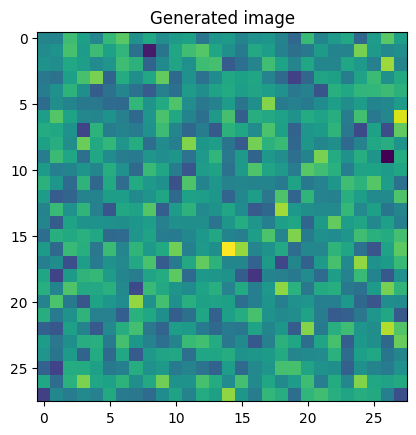

In [ ]:
plt.title("Generated image")
plt.imshow(fake.cpu().detach().numpy()[0])

#### Discriminator (鑑定士)

入力されたデータが正解ならば1，偽物だったら0を返すネットワークを作成します．これもネットワークはただのMLPです．

In [ ]:
def build_discriminator(in_features:int)->nn.Sequential:
    return nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features, 200),
        nn.ReLU(),
        nn.Linear(200, 200),
        nn.ReLU(),
        nn.Linear(200,1),
        nn.Sigmoid(),
    )

試してみましょう．

In [ ]:
_discriminator = build_discriminator(28*28)
_discriminator(fake) # 0が偽物，1が本物

tensor([[0.5022]], grad_fn=<SigmoidBackward0>)

### 損失関数

`nn.BCELoss`を利用します．

### 訓練の流れ

識別器→生成器の順番に交互に学習してください．


### 実験

#### 実験結果

## 参考文献

### 論文等

```{bibliography}
:filter: docname in docnames
```